# Analysis for the comparison based on graphs using HUGE package
Data is generated by `exp_hug_graph_batch.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ddn3 import simulation, performance
from ddn3_extra import plot_simulation

# %load_ext autoreload
# %autoreload 2

## DDN and JGL

In [ ]:
dat_dir = "../output_simulation/ddn_jgl/l1_002-002-100_l2_000-0025-015/"
graph_type = "imbalanced"
res_lst = []
if graph_type == "random":
    res_lst = [
        "res_ddn_jgl_random_n_20_n-node_100_200p200_group_0",
        "res_ddn_jgl_random_n_40_n-node_100_50p50_group_0",
    ]

if graph_type == "hub":
    res_lst = [
        "res_ddn_jgl_hub_n_20_n-node_100_200p200",
        "res_ddn_jgl_hub_n_20_n-node_100_50p50",
    ]

if graph_type == "cluster":
    res_lst = [
        "res_ddn_jgl_cluster_n_20_n-node_100_200p200",
        "res_ddn_jgl_cluster_n_20_n-node_100_50p50",
    ]

if graph_type == "scale_free_1":
    res_lst = [
        "res_ddn_jgl_scale-free_n_20_n-node_100_200p200",
        "res_ddn_jgl_scale-free_n_50_n-node_100_50p50",
    ]

if graph_type == "scale_free_2":
    res_lst = [
        "res_ddn_jgl_scale-free-multi_n_20_n-node_100_200p200_group_2",
        "res_ddn_jgl_scale-free-multi_n_40_n-node_100_50p50_group_2",
    ]

if graph_type == "scale_free_4":
    res_lst = [
        "res_ddn_jgl_scale-free-multi_n_20_n-node_100_200p200_group_4",
        "res_ddn_jgl_scale-free-multi_n_40_n-node_100_50p50_group_4",
    ]

if graph_type == "scale_free_8":
    res_lst = [
        "res_ddn_jgl_scale-free-multi_n_20_n-node_200_200p200_group_8",
        "res_ddn_jgl_scale-free-multi_n_40_n-node_200_50p50_group_8",
        "res_ddn_jgl_scale-free-multi_n_20_n-node_400_200p200_group_8",
        "res_ddn_jgl_scale-free-multi_n_40_n-node_400_50p50_group_8",
    ]

if graph_type == "imbalanced":
    res_lst = [
        # 'res_ddn_jgl_scale-free-multi_n_20_n-node_100_50p500_group_2_jgl-weights_sample.size',
        'res_ddn_jgl_scale-free-multi_n_20_n-node_100_50p500_group_2_jgl-weights_sample.size_ddn-weight_mean',
        'res_ddn_jgl_scale-free-multi_n_20_n-node_100_50p500_group_2_jgl-weights_equal',
        # 'res_ddn_jgl_scale-free-multi_n_20_n-node_100_275p275_group_2_jgl-weights_equal',
    ]


In [ ]:
for res_name in res_lst:
    temp = np.load(f"{dat_dir}/{graph_type}/{res_name}.npz")
    res = temp['res']
    l1_lst = temp['l1_lst']
    l2_lst = temp['l2_lst']
    print(res.shape)

    fig, ax = plot_simulation.plot_ddn_jgl_res(res, l1_lst, l2_lst)
    # fig.savefig(f"./sim_fig_out/{graph_type}_{res_name}.pdf")
    fig.savefig(f"./sim_fig_out/{graph_type}_{res_name}.png")


## Check synthetic data

In [ ]:
from ddn3_extra import simulation_r

In [ ]:
n_node = 200
ratio_diff = 0.25
omega, omega1, omega2 = simulation_r.huge_omega(
    n_node=n_node, ratio_diff=ratio_diff, graph_type="scale-free-multi", n_group=8,
)
g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, 200, 200)

In [ ]:
# plt.imshow(omega)
# plt.colorbar()

In [ ]:
# plt.imshow(diff_gt)

## Ratio of differences

In [2]:
def plot_ddn_jgl_res(res, l1_lst, l2_lst):
    res_mean = np.mean(res, axis=0)
    res_ddn_mean = res_mean[0]
    res_jgl_mean = res_mean[1]

    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    n_l2idx = len(res_ddn_mean)
    # xcut_comm = []
    # xcut_diff = []
    for l2idx in range(n_l2idx):
        alpha = 0.2 + 0.78 * l2idx / (n_l2idx - 1)
        # alpha = 1.0
        col_ddn = "tab:blue"
        col_jgl = "tab:orange"

        # common
        xddn = res_ddn_mean[l2idx, :, 0]
        xjgl = res_jgl_mean[l2idx, :, 0]
        label = f"DDN {l2_lst[l2idx]:.3f}"
        _ = plot_simulation.draw1(
            ax[0],
            xddn,
            2,
            4,
            remove_zero=True,
            color=col_ddn,
            alpha=alpha,
            label=label,
        )
        label = f"JGL {l2_lst[l2idx]:.3f}"
        _ = plot_simulation.draw1(
            ax[0],
            xjgl,
            2,
            4,
            remove_zero=True,
            color=col_jgl,
            alpha=alpha,
            label=label,
        )
        c0 = plot_simulation.draw1(ax[1], xddn, 1, 0, color=col_ddn, alpha=alpha)
        c1 = plot_simulation.draw1(ax[1], xjgl, 1, 0, color=col_jgl, alpha=alpha)
        # xcut_comm.extend([c0, c1])

    # ax[1].set_xlim([0, np.mean(xcut_comm)])

    ax[0].set_title("Common network")
    ax[0].set_xlabel("Recall")
    ax[0].set_ylabel("Precision")

    ax[1].set_title("Common network")
    ax[1].set_xlabel("FP")
    ax[1].set_ylabel("TP")

    return fig, ax

(16, 2, 7, 49, 2, 5)


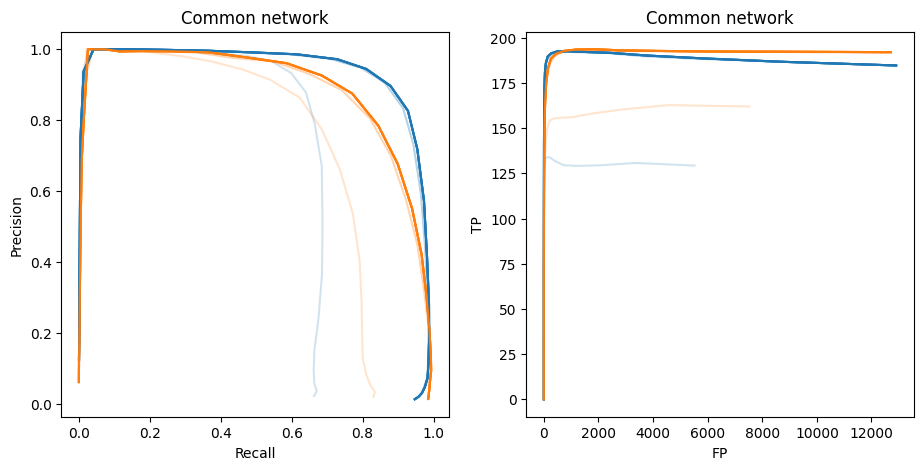

In [3]:
graph_type = "hub"
folder = "./"
# folder = "./sim_low_diff/"
res_lst = [
    "res_ddn_jgl_hub_n_16_n-node_200_100p100_group_5_ratio_0",
]

for res_name in res_lst:
    temp = np.load(f"{folder}/{res_name}.npz")
    res = temp['res']
    l1_lst = temp['l1_lst']
    l2_lst = temp['l2_lst']
    print(res.shape)

    fig, ax = plot_ddn_jgl_res(res, l1_lst, l2_lst)
    # fig.savefig(f"./sim_fig_out/{graph_type}_{res_name}.png")


(16, 2, 7, 49, 2, 5)